<a href="https://colab.research.google.com/github/panimesh14/Deep-Learning-/blob/main/CNN_Model_for_Object_Recognition_on_CIFAR10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CIFAR 10 Dataset
####Airplane:0, Car:1, Bird:2, Cat:3, Deer:4, Dog:5, Frog:6, Horse:7, Ship:8, Truck:9
#####50,000 Color images (RGB) of 50000x32x32(x3)

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [116]:
#Importing and Loading CIFAR10 dataset
from tensorflow.keras.datasets import cifar10
(Xtrain,Ytrain),(Xtest,Ytest)=cifar10.load_data()

In [117]:
Xtrain.shape

(50000, 32, 32, 3)

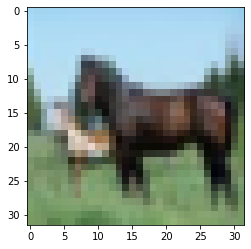

In [118]:

#Data Exploration and Preparation
plt.imshow(Xtrain[12])#Horse

In [119]:
Xtrain[0].max()#pixel value

255

In [120]:
np.unique(Ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [121]:
#Data Preparation
#One Hot Encoding for categorical variablea
from tensorflow.keras.utils import to_categorical
y_cat_train=to_categorical(Ytrain,10);
y_cat_test=to_categorical(Ytest,10);

In [133]:
#Model Building
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
cifar_model=Sequential()
#Covolutional Layer
cifar_model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
#Pooling Layer
cifar_model.add(MaxPool2D(pool_size=(2,2)))

#Covolutional Layer
cifar_model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
#Pooling Layer
cifar_model.add(MaxPool2D(pool_size=(2,2)))
#Flatten layer
cifar_model.add(Flatten())

#MLP
cifar_model.add(Dense(256,activation='relu'))#32×32×3=3072
cifar_model.add(Dense(10,activation='softmax'))#for 10 classes
cifar_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
cifar_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 800)               0         
                                                                 
 dense_10 (Dense)            (None, 256)              

In [134]:

#Early Stopping 
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [135]:
cifar_model.fit(Xtrain,y_cat_train,epochs=15,validation_split=0.2,callbacks=[early_stop])
#20% training dataset used for validation

Epoch 1/15
1250/1250 [==============================] - 56s 44ms/step - loss: 2.4732 - accuracy: 0.1070 - val_loss: 2.3019 - val_accuracy: 0.1024
Epoch 2/15
1250/1250 [==============================] - 53s 43ms/step - loss: 2.2873 - accuracy: 0.1275 - val_loss: 2.2681 - val_accuracy: 0.1773
Epoch 3/15
1250/1250 [==============================] - 54s 43ms/step - loss: 1.9179 - accuracy: 0.3043 - val_loss: 1.7302 - val_accuracy: 0.3692
Epoch 4/15
1250/1250 [==============================] - 53s 42ms/step - loss: 1.5850 - accuracy: 0.4291 - val_loss: 1.5212 - val_accuracy: 0.4512
Epoch 5/15
1250/1250 [==============================] - 54s 43ms/step - loss: 1.4214 - accuracy: 0.4947 - val_loss: 1.4867 - val_accuracy: 0.4698
Epoch 6/15
1250/1250 [==============================] - 53s 42ms/step - loss: 1.3010 - accuracy: 0.5397 - val_loss: 1.3930 - val_accuracy: 0.5168
Epoch 7/15
1250/1250 [==============================] - 54s 43ms/step - loss: 1.1955 - accuracy: 0.5770 - val_loss: 1.4324 -

In [136]:
#MOdel Evaluation
cifar_model_loss=pd.DataFrame(cifar_model.history.history)
cifar_model_loss.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

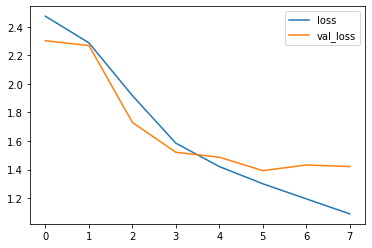

In [137]:
#loss metrics plot 
cifar_model_loss[['loss','val_loss']].plot()

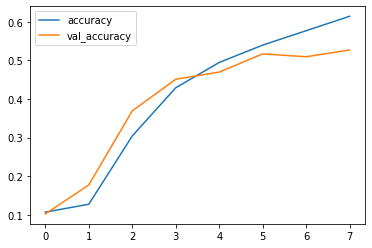

In [138]:
#accuracy metrics
cifar_model_loss[['accuracy','val_accuracy']].plot()

In [139]:
cifar_model.evaluate(Xtest,y_cat_test,verbose=0)

[1.4042084217071533, 0.5238000154495239]

In [140]:
#Multi-class classificaton
(cifar_model.predict(Xtest))

array([[1.26259355e-02, 1.82236033e-03, 3.53008471e-02, ...,
        4.06053998e-02, 8.35010409e-03, 5.31614432e-03],
       [5.77345490e-02, 5.97936690e-01, 1.12176337e-03, ...,
        8.08334560e-04, 1.56852901e-01, 1.84676006e-01],
       [2.24907741e-01, 6.84393272e-02, 3.77047881e-02, ...,
        1.85266286e-02, 3.50001425e-01, 1.62240967e-01],
       ...,
       [5.38533186e-07, 1.10156137e-07, 8.73908214e-03, ...,
        6.71207847e-04, 1.31508193e-06, 6.99388139e-08],
       [7.44575486e-02, 2.89564468e-02, 2.11808071e-01, ...,
        2.13150635e-01, 5.56171080e-03, 2.97220331e-02],
       [4.26179584e-04, 9.23789994e-05, 1.36998901e-02, ...,
        5.55945575e-01, 3.06792674e-04, 1.46261635e-04]], dtype=float32)

In [141]:
#Classification Report and Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
y_hat=np.argmax(cifar_model.predict(Xtest),axis=-1);
print(classification_report(Ytest,y_hat));

              precision    recall  f1-score   support

           0       0.57      0.53      0.55      1000
           1       0.63      0.70      0.67      1000
           2       0.45      0.42      0.44      1000
           3       0.32      0.50      0.39      1000
           4       0.48      0.46      0.47      1000
           5       0.42      0.40      0.41      1000
           6       0.66      0.54      0.60      1000
           7       0.61      0.57      0.59      1000
           8       0.65      0.53      0.58      1000
           9       0.60      0.57      0.58      1000

    accuracy                           0.52     10000
   macro avg       0.54      0.52      0.53     10000
weighted avg       0.54      0.52      0.53     10000



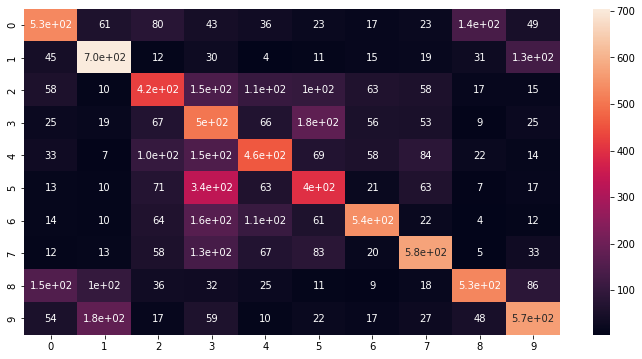

In [142]:
plt.figure(figsize=(12,6))
sns.heatmap((confusion_matrix(Ytest,y_hat)),annot=True)